In [2]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# data preparation
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

# machine learning
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression


In [3]:
## Get the data ready - our problem is classification cos we want to classify whether wine quality is low or high.
import pandas as pd
wine_quality = pd.read_csv("winequality-white.csv")
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine_quality.shape

(4898, 12)

In [5]:
wine_quality = wine_quality.rename(columns={"fixed acidity": "fixed_acidity", "volatile acidity": "vol_acidity","citric acid": "citr_acid", 
                             "residual sugar": "residual_sugar", "free sulfur dioxide": "free_sulfur_dioxide",
                             "total sulfur dioxide": "total_sulfur_dioxide"})
wine_quality.head()

,fixed_acidity,vol_acidity,citr_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
wine_quality.head(10)

,fixed_acidity,vol_acidity,citr_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [7]:
# Let's see label (quality) distribution in our dataframe
wine_quality.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [8]:
# create a list of our conditions
conditions = [(wine_quality['quality'] <= 5), 
              (wine_quality['quality'] >= 6)]

# create a list of the values we want to assign for each condition where '0' is low, '1' is high
values = [0, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
wine_quality['label'] = np.select(conditions, values)

# display updated DataFrame
wine_quality[300:310]

,fixed_acidity,vol_acidity,citr_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,label
300,6.1,0.41,0.00,1.6,0.063,36.0,87.0,0.9914,3.27,0.67,10.8,6,1
301,8.3,0.20,0.35,0.9,0.050,12.0,74.0,0.9920,3.13,0.38,10.5,6,1
302,6.1,0.41,0.00,1.6,0.063,36.0,87.0,0.9914,3.27,0.67,10.8,6,1
303,6.0,0.29,0.21,1.3,0.055,42.0,168.0,0.9914,3.32,0.43,11.1,6,1
304,7.3,0.41,0.24,6.8,0.057,41.0,163.0,0.9949,3.20,0.41,9.9,6,1
305,7.3,0.41,0.24,6.8,0.057,41.0,163.0,0.9949,3.20,0.41,9.9,6,1
306,7.2,0.43,0.24,6.7,0.058,40.0,163.0,0.9950,3.20,0.41,9.9,5,0
307,7.3,0.40,0.24,6.7,0.058,41.0,166.0,0.9950,3.20,0.41,9.9,6,1
308,6.2,0.33,0.27,4.9,0.036,30.0,134.0,0.9927,3.20,0.42,10.4,7,1
309,6.2,0.31,0.26,4.8,0.037,36.0,148.0,0.9928,3.21,0.41,10.4,6,1


In [9]:
wine_quality.label.value_counts()

1    3258
0    1640
Name: label, dtype: int64

In [10]:
wine_quality = wine_quality.drop(["quality"], axis=1)
wine_quality.head()

,fixed_acidity,vol_acidity,citr_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


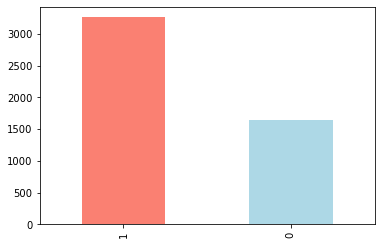

In [11]:
# Plot the value counts with a bar graph
wine_quality.label.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [12]:
wine_quality.describe()

,fixed_acidity,vol_acidity,citr_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


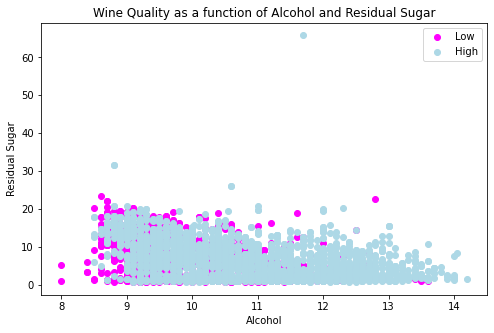

In [13]:
# Create another figure
plt.figure(figsize=(8,5))

# Start with low quality wines
plt.scatter(wine_quality.alcohol[wine_quality.label==0], 
            wine_quality.residual_sugar	[wine_quality.label==0],
            c="magenta") 

# High Quality Wines, we want them on the same plot, so we call plt again
plt.scatter(wine_quality.alcohol[wine_quality.label==1], 
            wine_quality.residual_sugar	[wine_quality.label==1], 
            c="lightblue") # define it as a scatter figure

# Add some helpful info
plt.title("Wine Quality as a function of Alcohol and Residual Sugar")
plt.xlabel("Alcohol")
plt.legend(["Low", "High"])
plt.ylabel("Residual Sugar");

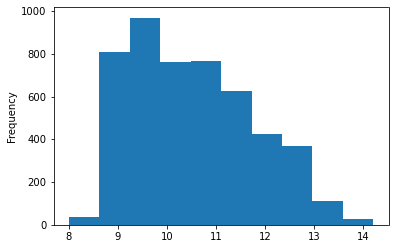

In [14]:
# Histograms are a great way to check the distribution of a variable
wine_quality.alcohol.plot.hist();

In [15]:
# set up random seed and create the X and y (train and test datasets)
np.random.seed(42)
X = wine_quality.drop(["label"], axis=1)
y = wine_quality["label"]
X.head()

,fixed_acidity,vol_acidity,citr_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


### Correlation between independent variables

Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using `df.corr()` which will create a [**correlation matrix**](https://www.statisticshowto.datasciencecentral.com/correlation-matrix/) for us, in other words, a big table of numbers telling us how related each variable is the other.

In [16]:
# Find the correlation between our independent variables
corr_matrix = wine_quality.corr()
corr_matrix 

,fixed_acidity,vol_acidity,citr_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.089749
vol_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.225440
citr_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.000700
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.092756
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.183939
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,-0.001278
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.170924
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.268696
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.083687
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.051858


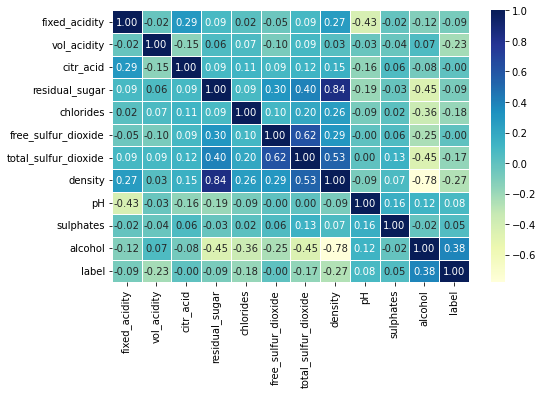

In [17]:
# Let's make it look a little prettier
corr_matrix = wine_quality.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

Much better. A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

## 5. Modeling

We've explored the data, now we'll try to use machine learning to predict our target variable based on the 11 independent variables.

Remember our problem?

That's what we'll be trying to answer.

And remember our evaluation metric?

> If we can reach 80% accuracy at predicting whether or not a bottle of wine is high quality, we'll adopt this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

Let's look at it again.

In [18]:
wine_quality.head()

,fixed_acidity,vol_acidity,citr_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [19]:
# set up random seed
np.random.seed(42)
X = wine_quality.drop(["label"], axis=1)
y = wine_quality["label"]
X.head()

,fixed_acidity,vol_acidity,citr_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [20]:
wine_quality['label'].value_counts()

1    3258
0    1640
Name: label, dtype: int64

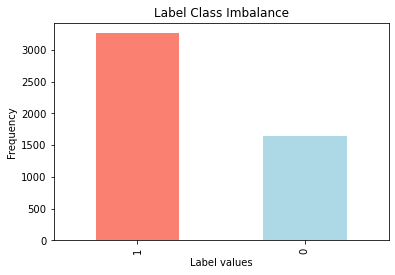

In [21]:
# imbalance of labels
wine_quality.label.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.title('Label Class Imbalance')
plt.xlabel('Label values')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3918, 11), (980, 11), (3918,), (980,))

In [24]:
X_train

,fixed_acidity,vol_acidity,citr_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
4665,7.3,0.17,0.36,8.20,0.028,44.0,111.0,0.99272,3.14,0.41,12.4
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5
3399,5.6,0.32,0.33,7.40,0.037,25.0,95.0,0.99268,3.25,0.49,11.1
843,6.9,0.19,0.35,1.70,0.036,33.0,101.0,0.99315,3.21,0.54,10.8
2580,7.7,0.30,0.26,18.95,0.053,36.0,174.0,0.99976,3.20,0.50,10.4
...,...,...,...,...,...,...,...,...,...,...,...
4426,6.2,0.21,0.52,6.50,0.047,28.0,123.0,0.99418,3.22,0.49,9.9
466,7.0,0.14,0.32,9.00,0.039,54.0,141.0,0.99560,3.22,0.43,9.4
3092,7.6,0.27,0.52,3.20,0.043,28.0,152.0,0.99129,3.02,0.53,11.4
3772,6.3,0.24,0.29,13.70,0.035,53.0,134.0,0.99567,3.17,0.38,10.6


In [25]:
y_train, len(y_train)

(4665    1
 1943    0
 3399    1
 843     1
 2580    0
        ..
 4426    1
 466     1
 3092    1
 3772    1
 860     1
 Name: label, Length: 3918, dtype: int32,
 3918)

In [26]:
# Scaling the data set

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dt_scaler = scaler.fit(X_train)
sc_X_train = dt_scaler.transform(X_train)
sc_X_test = dt_scaler.transform(X_test)

In [28]:
# Balancing the data sets

In [29]:
X_train_1, y_train_1 = make_imbalance(sc_X_train, y_train, 
                                  sampling_strategy={0: 1300, 1: 1300},random_state=14)

In [30]:
y_train_1.value_counts()

0    1300
1    1300
Name: label, dtype: int64

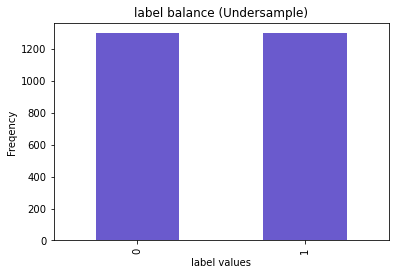

In [31]:
y_train_1.value_counts().plot(kind='bar', color='slateblue')
plt.title('label balance (Undersample)')
plt.xlabel('label values')
plt.ylabel('Freqency')
plt.show()

In [32]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_2, y_train_2 = ros.fit_resample(sc_X_train, y_train,)

In [33]:
y_train_2.value_counts()

1    2599
0    2599
Name: label, dtype: int64

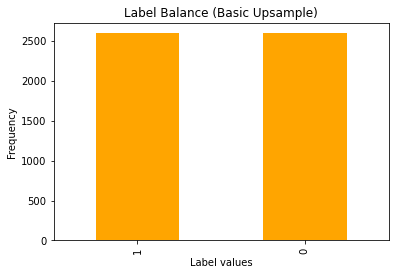

In [34]:
y_train_2.value_counts().plot(kind='bar', color='orange')
plt.title('Label Balance (Basic Upsample)')
plt.xlabel('Label values')
plt.ylabel('Frequency')
plt.show()

In [35]:
y_train_2.head()

0    1
1    0
2    1
3    1
4    0
Name: label, dtype: int32

In [36]:
smote = SMOTE(random_state = 14)
X_train_3, y_train_3 = smote.fit_resample(sc_X_train, y_train)

In [37]:
y_train_3.value_counts()

1    2599
0    2599
Name: label, dtype: int64

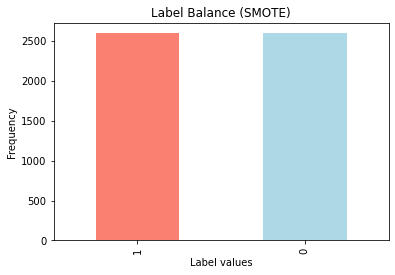

In [38]:
y_train_3.value_counts().plot(kind='bar', color=["salmon", "lightblue"])
plt.title('Label Balance (SMOTE)')
plt.xlabel('Label values')
plt.ylabel('Frequency')
plt.show()

### Model choices

Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. LinearSVC -

In [39]:
# Put models in a dictionary and fitting with Undersampling Balanced dataset
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Linear SVC": LinearSVC(max_iter=10000)}

# Create function to fit and score models
def fit_and_score(models, X_train_1, sc_X_test, y_train_1, y_test):
    """
    Fits and evaluates given machine learning models using Undersample Balanced Data.
    models : a dictionary of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores_1 = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train_1, y_train_1)
        # Evaluate the model and append its score to model_scores
        model_scores_1[name] = model.score(sc_X_test, y_test)
    return model_scores_1

In [40]:
model_scores_1 = fit_and_score(models=models,
                             X_train_1=X_train_1,
                             sc_X_test=sc_X_test,
                             y_train_1=y_train_1,
                             y_test=y_test
                             )
model_scores_1

{'KNN': 0.7285714285714285,
 'Logistic Regression': 0.7204081632653061,
 'Linear SVC': 0.7183673469387755}

In [41]:
# Put models in a dictionary and fitting with Oversampling Balanced dataset
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Linear SVC": LinearSVC(max_iter=10000)}

# Create function to fit and score models
def fit_and_score(models, X_train_2, sc_X_test, y_train_2, y_test):
    """
    Fits and evaluates given machine learning models using Upsample Balanced Data.
    models : a dictionary of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores_2 = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train_2, y_train_2)
        # Evaluate the model and append its score to model_scores
        model_scores_2[name] = model.score(sc_X_test, y_test)
    return model_scores_2

In [42]:
model_scores_2 = fit_and_score(models=models,
                             X_train_2=X_train_2,
                             sc_X_test=sc_X_test,
                             y_train_2=y_train_2,
                             y_test=y_test
                             )
model_scores_2

{'KNN': 0.726530612244898,
 'Logistic Regression': 0.7183673469387755,
 'Linear SVC': 0.7163265306122449}

In [43]:
# Put models in a dictionary and fitting with SMOTE Balanced dataset
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Linear SVC": LinearSVC(max_iter=10000)}

# Create function to fit and score models
def fit_and_score(models, X_train_3, sc_X_test, y_train_3, y_test):
    """
    Fits and evaluates given machine learning models using SMOTE balanced data.
    models : a dictionary of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores_3 = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train_3, y_train_3)
        # Evaluate the model and append its score to model_scores
        model_scores_3[name] = model.score(sc_X_test, y_test)
    return model_scores_3

In [44]:
model_scores_3 = fit_and_score(models=models,
                             X_train_3=X_train_3,
                             sc_X_test=sc_X_test,
                             y_train_3=y_train_3,
                             y_test=y_test
                             )
model_scores_3

{'KNN': 0.7377551020408163,
 'Logistic Regression': 0.7214285714285714,
 'Linear SVC': 0.7193877551020408}

In [45]:
# Setup random seed
np.random.seed(42)

# Instantiate LinearSVC with all 3 balancing methods
lsvc_model_1 = LinearSVC(max_iter=10000)
lsvc_model_1.fit(X_train_1, y_train_1)
lsvc_model_2 = LinearSVC(max_iter=10000)
lsvc_model_2.fit(X_train_2, y_train_2)
lsvc_model_3 = LinearSVC(max_iter=10000)
lsvc_model_3.fit(X_train_3, y_train_3)

# Evaluate the LinearSVC
print(f"LinearSVC Model Score with Undersampling Balancing method: {lsvc_model_1.score(sc_X_test, y_test)*100:.2f}%")
print(f"LinearSVC Model Score with Oversampling Balancing method: {lsvc_model_2.score(sc_X_test, y_test)*100:.2f}%")
print(f"LinearSVC Model Score with SMOTE Balancing method: {lsvc_model_3.score(sc_X_test, y_test)*100:.2f}%")

LinearSVC Model Score with Undersampling Balancing method: 71.84%
LinearSVC Model Score with Oversampling Balancing method: 71.63%
LinearSVC Model Score with SMOTE Balancing method: 71.94%


In [46]:
# Setup random seed
np.random.seed(42)

# Instantiate Logistic Regression with all 3 balancing methods
logreg_model_1 = LogisticRegression()
logreg_model_1.fit(X_train_1, y_train_1)
logreg_model_2 = LogisticRegression()
logreg_model_2.fit(X_train_2, y_train_2)
logreg_model_3 = LogisticRegression()
logreg_model_3.fit(X_train_3, y_train_3)

# Evaluate the LinearSVC
print(f"Logistic Regression Model Score with Undersampling Balancing method: {logreg_model_1.score(sc_X_test, y_test)*100:.2f}%")
print(f"Logistic Regression Model Score with Oversampling Balancing method: {logreg_model_2.score(sc_X_test, y_test)*100:.2f}%")
print(f"Logistic Regression Model Score with SMOTE Balancing method: {logreg_model_3.score(sc_X_test, y_test)*100:.2f}%")

Logistic Regression Model Score with Undersampling Balancing method: 72.04%
Logistic Regression Model Score with Oversampling Balancing method: 71.84%
Logistic Regression Model Score with SMOTE Balancing method: 72.14%


Beautiful! Since our models are fitting, let's compare them visually.

## Model Comparison

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

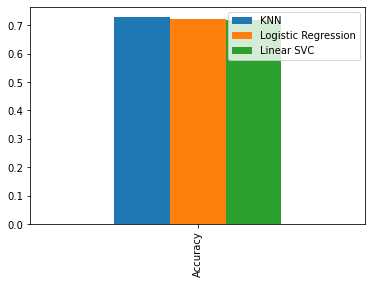

In [47]:
# Undersample Balanced Data
model_compare_1 = pd.DataFrame(model_scores_1, index=['Accuracy'])
model_compare_1.plot.bar();

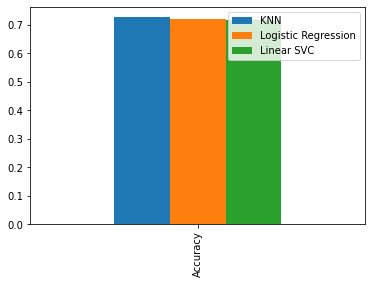

In [48]:
# Upsample Balanced Data
model_compare_2 = pd.DataFrame(model_scores_2, index=['Accuracy'])
model_compare_2.plot.bar();

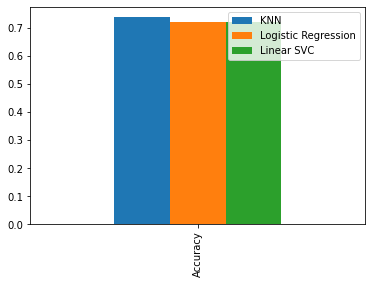

In [49]:
# Smote Balanced Data
model_compare_3 = pd.DataFrame(model_scores_3, index=['Accuracy'])
model_compare_3.plot.bar();

Beautiful! We can't really see it from the graph but looking at the dictionary, the KNN model performs best.

However, we can optimize the performance by each model by looking at some parameters.



* **Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* **Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average. 
* [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - Combines precision and recall into one metric. 1 is best, 0 is worst.
* [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
* [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html) - [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate.
* [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

There's one main hyperparameter we can tune for the K-Nearest Neighbors (KNN) algorithm, and that is number of neighbours. The default is 5 (`n_neigbors=5`).

We try a few different values of `n_neighbors`.

## Hyperparameters

In [50]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train_1, y_train_1)
    
    # Update the training scores
    train_scores.append(knn.score(X_train_1, y_train_1))
    
    # Update the test scores
    test_scores.append(knn.score(sc_X_test, y_test))

Let's look at KNN's train scores.

In [51]:
train_scores

[1.0,
 0.8684615384615385,
 0.8569230769230769,
 0.813076923076923,
 0.8192307692307692,
 0.7957692307692308,
 0.7984615384615384,
 0.7911538461538462,
 0.7892307692307692,
 0.7846153846153846,
 0.785,
 0.7796153846153846,
 0.7765384615384615,
 0.7680769230769231,
 0.7642307692307693,
 0.7623076923076924,
 0.7642307692307693,
 0.7692307692307693,
 0.7646153846153846,
 0.7623076923076924]

In [52]:
test_scores

[0.7591836734693878,
 0.689795918367347,
 0.7234693877551021,
 0.6908163265306122,
 0.7285714285714285,
 0.710204081632653,
 0.7428571428571429,
 0.7214285714285714,
 0.7438775510204082,
 0.7204081632653061,
 0.7428571428571429,
 0.7336734693877551,
 0.7346938775510204,
 0.7295918367346939,
 0.7397959183673469,
 0.7285714285714285,
 0.7377551020408163,
 0.7326530612244898,
 0.7459183673469387,
 0.7357142857142858]

Maximum KNN score on the test data: 75.92%


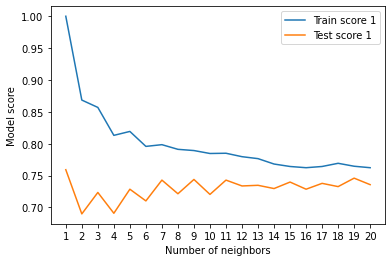

In [53]:
plt.plot(neighbors, train_scores, label="Train score 1")
plt.plot(neighbors, test_scores, label="Test score 1")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [54]:
# Create a list of train scores
train_scores_2 = []

# Create a list of test scores
test_scores_2 = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train_2, y_train_2)
    
    # Update the training scores
    train_scores_2.append(knn.score(X_train_2, y_train_2))
    
    # Update the test scores
    test_scores_2.append(knn.score(sc_X_test, y_test))

In [55]:
test_scores_2

[0.8040816326530612,
 0.75,
 0.7510204081632653,
 0.7081632653061225,
 0.726530612244898,
 0.7010204081632653,
 0.7316326530612245,
 0.7214285714285714,
 0.7285714285714285,
 0.7214285714285714,
 0.7326530612244898,
 0.7204081632653061,
 0.7357142857142858,
 0.7326530612244898,
 0.7377551020408163,
 0.7316326530612245,
 0.7438775510204082,
 0.7285714285714285,
 0.7306122448979592,
 0.7316326530612245]

Maximum KNN score on the test data: 80.41%


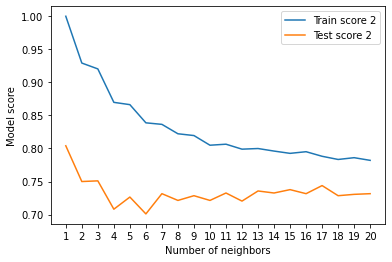

In [56]:
plt.plot(neighbors, train_scores_2, label="Train score 2")
plt.plot(neighbors, test_scores_2, label="Test score 2")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores_2)*100:.2f}%")

In [57]:
# Create a list of train scores
train_scores_3 = []

# Create a list of test scores
test_scores_3 = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train_3, y_train_3)
    
    # Update the training scores
    train_scores_3.append(knn.score(X_train_3, y_train_3))
    
    # Update the test scores
    test_scores_3.append(knn.score(sc_X_test, y_test))

In [58]:
test_scores_3

[0.7989795918367347,
 0.7285714285714285,
 0.7581632653061224,
 0.7214285714285714,
 0.7377551020408163,
 0.7193877551020408,
 0.7306122448979592,
 0.7173469387755103,
 0.7357142857142858,
 0.726530612244898,
 0.7377551020408163,
 0.7193877551020408,
 0.7346938775510204,
 0.7224489795918367,
 0.7295918367346939,
 0.7214285714285714,
 0.7326530612244898,
 0.7275510204081632,
 0.7357142857142858,
 0.7275510204081632]

Maximum KNN score on the test data: 79.90%


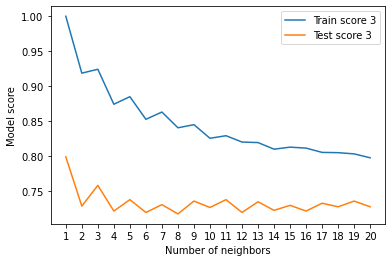

In [59]:
plt.plot(neighbors, train_scores_3, label="Train score 3")
plt.plot(neighbors, test_scores_3, label="Test score 3")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores_3)*100:.2f}%")

Looking at the graph, `n_neighbors = 1` seems best.

From the above, the `KNN`'s model performance is better than others but we can optimize the others two before drawing our conclusion.

Instead of us having to manually try different hyperparameters by hand, `RandomizedSearchCV` tries a number of different combinations, evaluates them and saves the best.

### Tuning models with with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)


We create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [60]:
# Different LogisticRegression hyperparameters
log_reg_grid_1 = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

log_reg_grid_2 = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

log_reg_grid_3 = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different LinearSVC hyperparameters
log_lin_svc_1 = {"C": np.logspace(-4, 4, 20),
              "intercept_scaling": np.logspace(-4, 4, 20)}
log_lin_svc_2 = {"C": np.logspace(-4, 4, 20),
              "intercept_scaling": np.logspace(-4, 4, 20)}
log_lin_svc_3 = {"C": np.logspace(-4, 4, 20),
              "intercept_scaling": np.logspace(-4, 4, 20)}

Now let's use `RandomizedSearchCV` to try and tune our `LogisticRegression` model.

We'll pass it the different hyperparameters from `log_reg_grid` as well as set `n_iter = 20`. This means, `RandomizedSearchCV` will try 20 different combinations of hyperparameters from `log_reg_grid` and save the best ones.

In [61]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg_1 = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid_1,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg_2 = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid_2,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg_3 = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid_3,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg_1.fit(X_train_1, y_train_1);
rs_log_reg_2.fit(X_train_2, y_train_2);
rs_log_reg_3.fit(X_train_3, y_train_3);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [62]:
print(rs_log_reg_1.best_params_)
print(rs_log_reg_2.best_params_)
print(rs_log_reg_3.best_params_)

{'solver': 'liblinear', 'C': 0.012742749857031334}
{'solver': 'liblinear', 'C': 0.012742749857031334}
{'solver': 'liblinear', 'C': 0.004832930238571752}


In [63]:
print(rs_log_reg_1.score(sc_X_test, y_test)) # tuning hyperparameters C and solver gives us a lower degree of accuracy 
print(rs_log_reg_2.score(sc_X_test, y_test))                           
print(rs_log_reg_3.score(sc_X_test, y_test))

0.7183673469387755
0.7153061224489796
0.7173469387755103


In [64]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LinearSVC
rs_lin_svc_1 = RandomizedSearchCV(LinearSVC(),
                                param_distributions=log_lin_svc_1,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_lin_svc_2 = RandomizedSearchCV(LinearSVC(),
                                param_distributions=log_lin_svc_2,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_lin_svc_3 = RandomizedSearchCV(LinearSVC(),
                                param_distributions=log_lin_svc_3,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_lin_svc_1.fit(X_train_1, y_train_1);
rs_lin_svc_2.fit(X_train_2, y_train_2);
rs_lin_svc_3.fit(X_train_3, y_train_3);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

In [65]:
print(rs_lin_svc_1.best_params_)
print(rs_lin_svc_2.best_params_)
print(rs_lin_svc_3.best_params_)

{'intercept_scaling': 11.288378916846883, 'C': 0.0018329807108324356}
{'intercept_scaling': 11.288378916846883, 'C': 0.0018329807108324356}
{'intercept_scaling': 0.615848211066026, 'C': 0.0006951927961775605}


In [66]:
print(rs_lin_svc_1.score(sc_X_test, y_test)) # tuning hyperparameters C and intercept_scaling gives 
print(rs_lin_svc_2.score(sc_X_test, y_test)) # us a lower degree of accuracy
print(rs_lin_svc_3.score(sc_X_test, y_test))

0.7153061224489796
0.713265306122449
0.7163265306122449


In [67]:
# Time taken to train the lInearSVC model.
%timeit rs_lin_svc_1.fit(X_train_1, y_train_1);
%timeit rs_lin_svc_2.fit(X_train_2, y_train_2);
%timeit rs_lin_svc_3.fit(X_train_3, y_train_3);

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

7.64 s ± 975 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

16.5 s ± 1.23 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

17.6 s ± 1.84 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [68]:
# Time taken to predict using the linearSVC model.
%timeit lsvc_model_1.predict(sc_X_test)
%timeit lsvc_model_2.predict(sc_X_test)
%timeit lsvc_model_3.predict(sc_X_test)

73.5 µs ± 5.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
70.5 µs ± 1.55 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
71.5 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Excellent! Tuning the hyperparameters for each model saw a slight reduction in performance boost in both the `LinearSVC` and `LogisticRegression`.

This is akin to tuning the settings on your oven and getting it to cook your favourite dish just right.

We give `LogisticRegression` another try to see if we can pull out something better using [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

### Tuning a model with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

The difference between `RandomizedSearchCV` and `GridSearchCV` is where `RandomizedSearchCV` searches over a grid of hyperparameters performing `n_iter` combinations, `GridSearchCV` will test every single possible combination.

In short:
* `RandomizedSearchCV` - tries `n_iter` combinations of hyperparameters and saves the best.
* `GridSearchCV` - tries every single combination of hyperparameters and saves the best.

Let's see it in action.

In [69]:
# Different LogisticRegression hyperparameters
gs_log_reg_grid_1 = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
gs_log_reg_grid_2 = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
gs_log_reg_grid_3 = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg_1 = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid_1,
                          cv=5,
                          verbose=True)
gs_log_reg_2 = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid_2,
                          cv=5,
                          verbose=True)
gs_log_reg_3 = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid_3,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg_1.fit(X_train_1, y_train_1);
gs_log_reg_2.fit(X_train_2, y_train_2);
gs_log_reg_3.fit(X_train_3, y_train_3);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [70]:
# Check the best parameters
print(gs_log_reg_1.best_params_)
print(gs_log_reg_2.best_params_)
print(gs_log_reg_3.best_params_)

{'C': 0.012742749857031334, 'solver': 'liblinear'}
{'C': 0.012742749857031334, 'solver': 'liblinear'}
{'C': 0.004832930238571752, 'solver': 'liblinear'}


In [71]:
# Evaluate the model
print(gs_log_reg_1.score(sc_X_test, y_test))
print(gs_log_reg_2.score(sc_X_test, y_test))
print(gs_log_reg_3.score(sc_X_test, y_test))

0.7183673469387755
0.7153061224489796
0.7173469387755103


In [72]:
# Time taken to train the logistic Regression model.
%timeit gs_log_reg_1.fit(X_train_1, y_train_1);
%timeit gs_log_reg_2.fit(X_train_2, y_train_2);
%timeit gs_log_reg_3.fit(X_train_3, y_train_3);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
358 ms ± 6.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fi

In [73]:
# Time taken to predict using the logistic Regression model.
%timeit logreg_model_1.predict(sc_X_test)
%timeit logreg_model_2.predict(sc_X_test)
%timeit logreg_model_3.predict(sc_X_test)

71.4 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
70.8 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
70.5 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn_model_1 = KNeighborsClassifier(n_neighbors=1)
knn_model_1.fit(X_train_1, y_train_1);
knn_model_2 = KNeighborsClassifier(n_neighbors=1)
knn_model_2.fit(X_train_2, y_train_2);
knn_model_3 = KNeighborsClassifier(n_neighbors=1)
knn_model_3.fit(X_train_3, y_train_3);

In [75]:
# Time taken to train the KNN model.
%timeit knn_model_1.fit(X_train_1, y_train_1);
%timeit knn_model_2.fit(X_train_2, y_train_2);
%timeit knn_model_3.fit(X_train_3, y_train_3);

3.33 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.34 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.17 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [76]:
# Time taken to test the KNN model.
%timeit knn_model_1.predict(sc_X_test)
%timeit knn_model_2.predict(sc_X_test)
%timeit knn_model_3.predict(sc_X_test)

49.4 ms ± 1e+03 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
59 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
59 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [77]:
knn_preds_1 = knn_model_1.predict(sc_X_test)
knn_preds_2 = knn_model_2.predict(sc_X_test)
knn_preds_3 = knn_model_3.predict(sc_X_test)

In [78]:
knn_preds_2[:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [79]:
y_test[:10]

4656    1
3659    1
907     1
4352    0
3271    1
4632    1
2244    0
1924    0
3801    1
2634    0
Name: label, dtype: int32

## Evaluating a classification model, beyond accuracy

Now we've got a tuned model, let's get some of the metrics we discussed before.

We want:
* ROC curve and AUC score - [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Luckily, Scikit-Learn has these all built-in.

To access them, we'll have to use our model to make predictions on the test set. You can make predictions by calling `predict()` on a trained model and passing it the data you'd like to predict on.

We'll make predictions on the test data.

In [80]:
# Make predictions on test data for Logistic Regression
lr_preds_1 = logreg_model_1.predict(sc_X_test)
lr_preds_2 = logreg_model_2.predict(sc_X_test)
lr_preds_3 = logreg_model_3.predict(sc_X_test)

Let's see them.

They look like our original test data labels, except different where the model has predicred wrong.

In [81]:
#y_test[:10]

In [82]:
# Make predictions on test data for LinearSVC
lsvc_preds_1 = lsvc_model_1.predict(sc_X_test)
lsvc_preds_2 = lsvc_model_2.predict(sc_X_test)
lsvc_preds_3 = lsvc_model_3.predict(sc_X_test)

Since we've got our prediction values we can find the metrics we want.

Let's start with the ROC curve and AUC scores.

### ROC Curve and AUC Scores

It's a way of understanding how our model is performing by comparing the true positive rate to the false positive rate.

In our case...

A false positive in this case occurs when the wine quality is predicted as high but is actually low. A false negative, on the other hand, occurs when the wine quality is predicted as low when they are actually high quality.


In [83]:
# Setup random seed
np.random.seed(42)

# Instantiate LinearSVC with all 3 balancing methods
logreg_model_1 = LogisticRegression()
logreg_model_1.fit(X_train_1, y_train_1)
logreg_model_2 = LogisticRegression()
logreg_model_2.fit(X_train_2, y_train_2)
logreg_model_3 = LogisticRegression()
logreg_model_3.fit(X_train_3, y_train_3)

# Evaluate the LinearSVC
print(f"Logistic Regression Model Score with Undersampling Balancing method: {logreg_model_1.score(sc_X_test, y_test)*100:.2f}%")
print(f"Logistic Regression Model Score with Oversampling Balancing method: {logreg_model_2.score(sc_X_test, y_test)*100:.2f}%")
print(f"Logistic Regression Model Score with SMOTE Balancing method: {logreg_model_3.score(sc_X_test, y_test)*100:.2f}%")

Logistic Regression Model Score with Undersampling Balancing method: 72.04%
Logistic Regression Model Score with Oversampling Balancing method: 71.84%
Logistic Regression Model Score with SMOTE Balancing method: 72.14%


In [84]:
lr_preds_1 = logreg_model_1.predict(sc_X_test)
lr_preds_2 = logreg_model_2.predict(sc_X_test)
lr_preds_3 = logreg_model_3.predict(sc_X_test)

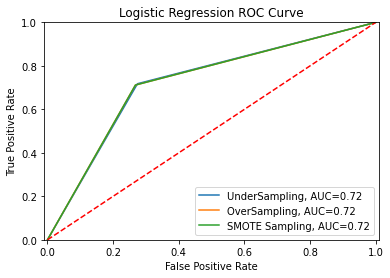

In [85]:
#set up plotting area
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
#plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
logreg_model_1 = LogisticRegression()
logreg_model_1.fit(X_train_1, y_train_1)
lr_preds_1 = logreg_model_1.predict(sc_X_test) #[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, lr_preds_1)
auc = round(metrics.roc_auc_score(y_test, lr_preds_1), 2)
plt.plot(fpr,tpr,label="UnderSampling, AUC="+str(auc))

logreg_model_2 = LogisticRegression()
logreg_model_2.fit(X_train_2, y_train_2)
lr_preds_2 = logreg_model_2.predict(sc_X_test) #[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, lr_preds_2)
auc = round(metrics.roc_auc_score(y_test, lr_preds_2), 2)
plt.plot(fpr,tpr,label="OverSampling, AUC="+str(auc))

logreg_model_3 = LogisticRegression()
logreg_model_3.fit(X_train_3, y_train_3)
lr_preds_3 = logreg_model_2.predict(sc_X_test) #[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, lr_preds_3)
auc = round(metrics.roc_auc_score(y_test, lr_preds_3), 2)
plt.plot(fpr,tpr, label="SMOTE Sampling, AUC="+str(auc))
#plt.plot
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
#add legend
plt.legend(loc = 'lower right')
plt.show()

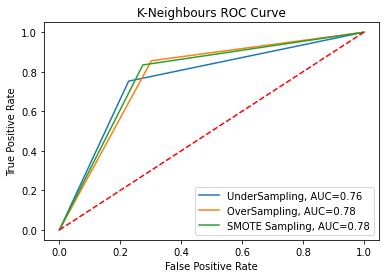

In [86]:
#fit KNN model and plot ROC curve
knn_model_1 = KNeighborsClassifier(n_neighbors=1)
knn_model_1.fit(X_train_1, y_train_1)
knn_preds_1 = knn_model_1.predict(sc_X_test) #[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, knn_preds_1)
auc = round(metrics.roc_auc_score(y_test, knn_preds_1), 2)
plt.plot(fpr,tpr,label="UnderSampling, AUC="+str(auc))

knn_model_2 = KNeighborsClassifier(n_neighbors=1)
knn_model_2.fit(X_train_2, y_train_2)
knn_preds_2 = knn_model_2.predict(sc_X_test) #[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, knn_preds_2)
auc = round(metrics.roc_auc_score(y_test, knn_preds_2), 2)
plt.plot(fpr,tpr,label="OverSampling, AUC="+str(auc))

knn_model_3 = KNeighborsClassifier(n_neighbors=1)
knn_model_3.fit(X_train_3, y_train_3)
knn_preds_3 = knn_model_3.predict(sc_X_test) #[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, knn_preds_3)
auc = round(metrics.roc_auc_score(y_test, knn_preds_3), 2)
plt.plot(fpr,tpr,label="SMOTE Sampling, AUC="+str(auc))
#plt.plot
plt.plot([0,1], [0,1], 'r--')
#plt.xlim([-0.01, 1.01])
#plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Neighbours ROC Curve')
#add legend
plt.legend(loc = 'lower right')
plt.show()

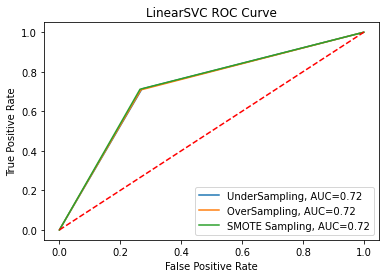

In [87]:
#fit LinearSVC model and plot ROC curve
lsvc_model_1 = LinearSVC(max_iter=10000)
lsvc_model_1.fit(X_train_1, y_train_1)
lsvc_preds_1 = lsvc_model_1.predict(sc_X_test) #[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, lsvc_preds_1)
auc = round(metrics.roc_auc_score(y_test, lsvc_preds_1), 2)
plt.plot(fpr,tpr,label="UnderSampling, AUC="+str(auc))

lsvc_model_2 = LinearSVC(max_iter=10000)
lsvc_model_2.fit(X_train_2, y_train_2)
lsvc_preds_2 = lsvc_model_2.predict(sc_X_test) #[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, lsvc_preds_2)
auc = round(metrics.roc_auc_score(y_test, lsvc_preds_2), 2)
plt.plot(fpr,tpr,label="OverSampling, AUC="+str(auc))

lsvc_model_3 = LinearSVC(max_iter=10000)
lsvc_model_3.fit(X_train_3, y_train_3)
lsvc_preds_3 = lsvc_model_3.predict(sc_X_test) #[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, lsvc_preds_3)
auc = round(metrics.roc_auc_score(y_test, lsvc_preds_3), 2)
plt.plot(fpr,tpr,label="SMOTE Sampling, AUC="+str(auc))
#plt.plot
plt.plot([0,1], [0,1], 'r--')
#plt.xlim([-0.01, 1.01])
#plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LinearSVC ROC Curve')
#add legend
plt.legend(loc = 'lower right')
plt.show()

Our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.72 But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.


### Confusion matrix 

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and passing it the true labels and predicted labels.

Since we are presenting a paper we want to make it visual.

Let's create a function which uses Seaborn's [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) for doing so.

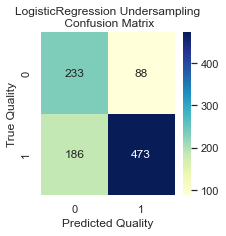

In [88]:
sns.set(font_scale=1) # Increase font size
 
def plot_conf_mat(y_test, lr_preds_1):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, lr_preds_1),
                     annot=True, # Annotate the boxes
                     cmap='YlGnBu', fmt='g')
    plt.xlabel("Predicted Quality") # predictions go on the x-axis
    plt.ylabel("True Quality") # true labels go on the y-axis 
    plt.title("LogisticRegression Undersampling\n Confusion Matrix")
plot_conf_mat(y_test, lr_preds_1)

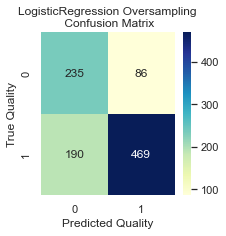

In [89]:
sns.set(font_scale=1) # Increase font size
 
def plot_conf_mat(y_test, lr_preds_2):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, lr_preds_2),
                     annot=True, # Annotate the boxes
                     cmap='YlGnBu', fmt='g')
    plt.xlabel("Predicted Quality") # predictions go on the x-axis
    plt.ylabel("True Quality") # true labels go on the y-axis 
    plt.title("LogisticRegression Oversampling\n Confusion Matrix")
plot_conf_mat(y_test, lr_preds_2)

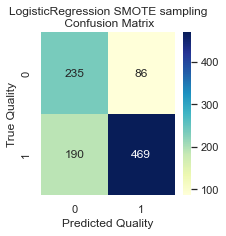

In [90]:

sns.set(font_scale=1) # Increase font size
 
def plot_conf_mat(y_test, lr_preds_3):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, lr_preds_3),
                     annot=True, # Annotate the boxes
                     cmap='YlGnBu', fmt='g')
    plt.xlabel("Predicted Quality") # predictions go on the x-axis
    plt.ylabel("True Quality") # true labels go on the y-axis 
    plt.title("LogisticRegression SMOTE sampling\n Confusion Matrix")
plot_conf_mat(y_test, lr_preds_3)

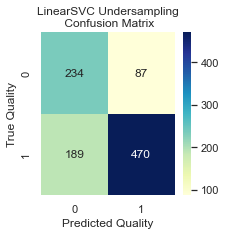

In [91]:

sns.set(font_scale=1) # Increase font size
 
def plot_conf_mat(y_test, lsvc_preds_1):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, lsvc_preds_1),
                     annot=True, # Annotate the boxes
                     cmap='YlGnBu', fmt='g')
    plt.xlabel("Predicted Quality") # predictions go on the x-axis
    plt.ylabel("True Quality") # true labels go on the y-axis 
    plt.title("LinearSVC Undersampling\n Confusion Matrix")
plot_conf_mat(y_test, lsvc_preds_1)

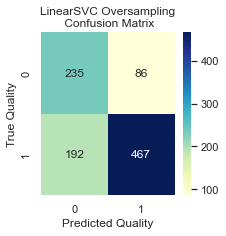

In [92]:

sns.set(font_scale=1) # Increase font size
 
def plot_conf_mat(y_test, lsvc_preds_2):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, lsvc_preds_2),
                     annot=True, # Annotate the boxes
                     cmap='YlGnBu', fmt='g')
    plt.xlabel("Predicted Quality") # predictions go on the x-axis
    plt.ylabel("True Quality") # true labels go on the y-axis 
    plt.title("LinearSVC Oversampling\n Confusion Matrix")
plot_conf_mat(y_test, lsvc_preds_2)

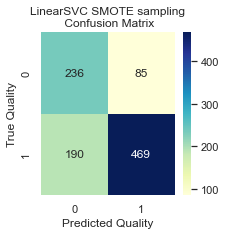

In [93]:

sns.set(font_scale=1) # Increase font size
 
def plot_conf_mat(y_test, lsvc_preds_3):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, lsvc_preds_3),
                     annot=True, # Annotate the boxes
                     cmap='YlGnBu', fmt='g')
    plt.xlabel("Predicted Quality") # predictions go on the x-axis
    plt.ylabel("True Quality") # true labels go on the y-axis 
    plt.title("LinearSVC SMOTE sampling\n Confusion Matrix")
plot_conf_mat(y_test, lsvc_preds_3)

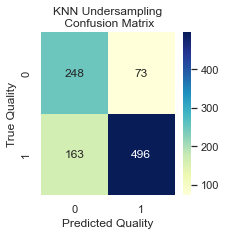

In [94]:
def plot_conf_mat(y_test, knn_preds_1):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, knn_preds_1),
                     annot=True, # Annotate the boxes
                     cmap='YlGnBu', fmt='g')
    plt.xlabel("Predicted Quality") # predictions go on the x-axis
    plt.ylabel("True Quality") # true labels go on the y-axis
    plt.title("KNN Undersampling\n Confusion Matrix")
    sns.set(font_scale=1) 
    
plot_conf_mat(y_test, knn_preds_1)

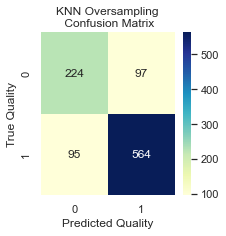

In [95]:
def plot_conf_mat(y_test, knn_preds_2):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, knn_preds_2),
                     annot=True, # Annotate the boxes
                     cmap='YlGnBu', fmt='g')
    plt.xlabel("Predicted Quality") # predictions go on the x-axis
    plt.ylabel("True Quality") # true labels go on the y-axis
    plt.title("KNN Oversampling\n Confusion Matrix")
    
plot_conf_mat(y_test, knn_preds_2)

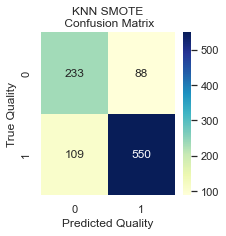

In [96]:
def plot_conf_mat(y_test, knn_preds_3):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, knn_preds_3),
                     annot=True, # Annotate the boxes
                     cmap='YlGnBu', fmt='g')
    plt.xlabel("Predicted Quality") # predictions go on the x-axis
    plt.ylabel("True Quality") # true labels go on the y-axis 
    plt.title("KNN SMOTE\n Confusion Matrix") # predictions go on the x-axis
    
plot_conf_mat(y_test, knn_preds_3)

Beautiful! That looks much better. 

We can see the model gets confused (predicts the wrong label) relatively the same across both classes. In essence, there are several occasaions where the model predicted 0 when it should've been 1 (false negative) and occasions where the model predicted 1 instead of 0 (false positive).

### Classification report

We can make a classification report using [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and passing it the true labels as well as our models predicted labels. 

A classification report will also give us information of the precision and recall of our model for each class.

In [97]:
# Show classification report
print(classification_report(y_test, knn_preds_1))

              precision    recall  f1-score   support

           0       0.60      0.77      0.68       321
           1       0.87      0.75      0.81       659

    accuracy                           0.76       980
   macro avg       0.74      0.76      0.74       980
weighted avg       0.78      0.76      0.77       980



In [98]:
print(classification_report(y_test, knn_preds_2))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       321
           1       0.85      0.86      0.85       659

    accuracy                           0.80       980
   macro avg       0.78      0.78      0.78       980
weighted avg       0.80      0.80      0.80       980



In [99]:
print(classification_report(y_test, knn_preds_3))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       321
           1       0.86      0.83      0.85       659

    accuracy                           0.80       980
   macro avg       0.77      0.78      0.78       980
weighted avg       0.80      0.80      0.80       980



In [100]:
print(classification_report(y_test, lr_preds_1))

              precision    recall  f1-score   support

           0       0.56      0.73      0.63       321
           1       0.84      0.72      0.78       659

    accuracy                           0.72       980
   macro avg       0.70      0.72      0.70       980
weighted avg       0.75      0.72      0.73       980



In [101]:
print(classification_report(y_test, lr_preds_2))

              precision    recall  f1-score   support

           0       0.55      0.73      0.63       321
           1       0.85      0.71      0.77       659

    accuracy                           0.72       980
   macro avg       0.70      0.72      0.70       980
weighted avg       0.75      0.72      0.73       980



In [102]:
print(classification_report(y_test, lr_preds_3))

              precision    recall  f1-score   support

           0       0.55      0.73      0.63       321
           1       0.85      0.71      0.77       659

    accuracy                           0.72       980
   macro avg       0.70      0.72      0.70       980
weighted avg       0.75      0.72      0.73       980



In [103]:
print(classification_report(y_test, lsvc_preds_1))

              precision    recall  f1-score   support

           0       0.55      0.73      0.63       321
           1       0.84      0.71      0.77       659

    accuracy                           0.72       980
   macro avg       0.70      0.72      0.70       980
weighted avg       0.75      0.72      0.73       980



In [104]:
print(classification_report(y_test, lsvc_preds_2))

              precision    recall  f1-score   support

           0       0.55      0.73      0.63       321
           1       0.84      0.71      0.77       659

    accuracy                           0.72       980
   macro avg       0.70      0.72      0.70       980
weighted avg       0.75      0.72      0.72       980



In [105]:
print(classification_report(y_test, lsvc_preds_3))

              precision    recall  f1-score   support

           0       0.55      0.74      0.63       321
           1       0.85      0.71      0.77       659

    accuracy                           0.72       980
   macro avg       0.70      0.72      0.70       980
weighted avg       0.75      0.72      0.73       980



What's going on here?

Let's get a refresh.

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

Ok, now we've got a few deeper insights on our model. But these were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.

How?

We'll take the best model along with the best hyperparameters and use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) along with various `scoring` parameter values.

In [106]:
# Check best hyperparameters
# gs_log_reg.best_params_

In [107]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression()

Now we've got an instantiated classifier, let's find some cross-validated metrics.

In [108]:
# Cross-validated accuracy score
cv_acc_1 = cross_val_score(clf,
                         X_train_1,
                         y_train_1,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc_2 = cross_val_score(clf,
                         X_train_2,
                         y_train_2,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc_3 = cross_val_score(clf,
                         X_train_3,
                         y_train_3,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
print('Cross Validtion Accuracy Score with Undersampling', cv_acc_1)
print('Cross Validtion Accuracy Score with Oversampling', cv_acc_2)
print('Cross Validtion Accuracy Score with SMOTE sampling', cv_acc_3)

Cross Validtion Accuracy Score with Undersampling [0.69038462 0.77884615 0.70769231 0.67884615 0.74038462]
Cross Validtion Accuracy Score with Oversampling [0.725      0.72980769 0.74230769 0.719923   0.71414822]
Cross Validtion Accuracy Score with SMOTE sampling [0.72019231 0.72403846 0.71923077 0.73243503 0.71896054]


Since there are 5 metrics here, we'll take the average.

In [109]:
scaler = StandardScaler()
dt_scaler = scaler.fit(X)
X_scale = dt_scaler.transform(X)

In [110]:
y = wine_quality["label"]
len(y)

4898

In [111]:
# balancing it. Undersampling
X_scale_1, y1 = make_imbalance(X_scale, y, 
                                  sampling_strategy={0: 1300, 1: 1300},random_state=14)

In [112]:
# balancing it Oversampling
X_scale_2, y2 = ros.fit_resample(X_scale, y)

In [113]:
# balancing it SMOTE - Oversampling
X_scale_3, y3 = smote.fit_resample(X_scale, y)

In [114]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression()

In [115]:
cv_acc_lr1 = cross_val_score(clf,
                         X_scale_1,
                         y1,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc_lr2 = cross_val_score(clf,
                         X_scale_2,
                         y2,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc_lr3 = cross_val_score(clf,
                         X_scale_3,
                         y3,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
print('Cross Validtion Accuracy Score with Undersampling', cv_acc_lr1)
print('Cross Validtion Accuracy Score with Oversampling', cv_acc_lr2)
print('Cross Validtion Accuracy Score with SMOTE sampling', cv_acc_lr3)

Cross Validtion Accuracy Score with Undersampling [0.72884615 0.72884615 0.69807692 0.71923077 0.70769231]
Cross Validtion Accuracy Score with Oversampling [0.67407975 0.63161934 0.69915579 0.7789716  0.74443592]
Cross Validtion Accuracy Score with SMOTE sampling [0.66794479 0.63315426 0.69224866 0.7943208  0.75211051]


In [116]:
cv_acc_lrm1 = np.mean(cv_acc_lr1)
cv_acc_lrm2 = np.mean(cv_acc_lr2)
cv_acc_lrm3 = np.mean(cv_acc_lr3)
print(cv_acc_lrm1)
print(cv_acc_lrm2)
print(cv_acc_lrm3)

0.7165384615384616
0.7056524820023636
0.7079558027958134


In [117]:
clf_knn = KNeighborsClassifier(n_neighbors=1)
# Cross-validated accuracy score
cv_acc_knn1 = cross_val_score(clf_knn,
                         X_scale_1,
                         y1,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc_knn2 = cross_val_score(clf_knn,
                         X_scale_2,
                         y2,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc_knn3 = cross_val_score(clf_knn,
                         X_scale_3,
                         y3,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
print('Cross Validtion Accuracy Score with Undersampling', cv_acc_knn1)
print('Cross Validtion Accuracy Score with Oversampling', cv_acc_knn2)
print('Cross Validtion Accuracy Score with SMOTE sampling', cv_acc_knn3)

Cross Validtion Accuracy Score with Undersampling [0.73076923 0.73076923 0.725      0.74615385 0.69423077]
Cross Validtion Accuracy Score with Oversampling [0.74923313 0.7467383  0.82425173 0.8971604  0.8856485 ]
Cross Validtion Accuracy Score with SMOTE sampling [0.74616564 0.74059862 0.81043745 0.88871834 0.87183423]


In [118]:
cv_acc_knn_m1 = np.mean(cv_acc_knn1)
cv_acc_knn_m2 = np.mean(cv_acc_knn2)
cv_acc_knn_m3 = np.mean(cv_acc_knn3)
print(cv_acc_knn_m1)
print(cv_acc_knn_m2)
print(cv_acc_knn_m3)

0.7253846153846153
0.8206064108781528
0.8115508571536191


In [119]:
clf_lsvc = LinearSVC(max_iter=10000)

# Cross-validated accuracy score
cv_acc_lsvc1 = cross_val_score(clf_lsvc,
                         X_scale_1,
                         y1,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc_lsvc2 = cross_val_score(clf_lsvc,
                         X_scale_2,
                         y2,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc_lsvc3 = cross_val_score(clf_lsvc,
                         X_scale_3,
                         y3,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
print('Cross Validtion Accuracy Score with Undersampling', cv_acc_lsvc1)
print('Cross Validtion Accuracy Score with Oversampling', cv_acc_lsvc2)
print('Cross Validtion Accuracy Score with SMOTE sampling', cv_acc_lsvc3)

Cross Validtion Accuracy Score with Undersampling [0.725      0.73269231 0.69423077 0.71923077 0.71346154]
Cross Validtion Accuracy Score with Oversampling [0.67944785 0.63392172 0.69838833 0.77820414 0.7467383 ]
Cross Validtion Accuracy Score with SMOTE sampling [0.66871166 0.63545664 0.6953185  0.78971604 0.75364543]


In [120]:
cv_acc_lsvc_m1 = np.mean(cv_acc_lsvc1)
cv_acc_lsvc_m2 = np.mean(cv_acc_lsvc2)
cv_acc_lsvc_m3 = np.mean(cv_acc_lsvc3)
print(cv_acc_lsvc_m1)
print(cv_acc_lsvc_m2)
print(cv_acc_lsvc_m3)

0.716923076923077
0.7073400694009576
0.7085696528539615



Another model evaluation techniques is feature importance.

## Feature importance

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

In [121]:
wine_quality.head()

,fixed_acidity,vol_acidity,citr_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [122]:
features_dict = dict(zip(wine_quality.columns, list(logreg_model_3.coef_[0])))
features_dict

{'fixed_acidity': -0.04256038707823641,
 'vol_acidity': -0.6956991811204202,
 'citr_acid': -0.015970684222201836,
 'residual_sugar': 0.6580693133017378,
 'chlorides': 0.039655705953569646,
 'free_sulfur_dioxide': 0.2549379605012218,
 'total_sulfur_dioxide': -0.10762319636559574,
 'density': -0.4243998111685165,
 'pH': 0.09657268243047662,
 'sulphates': 0.20554726029779938,
 'alcohol': 1.1594069880350713}

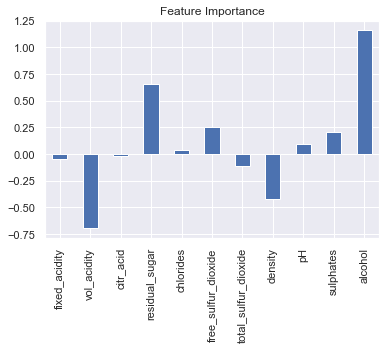

In [123]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);